## Visualizing json files using matplotlib

### By Akshay Shivaram

#### Importing libraries

In [1]:
import sys
sys.path += ['../..']

import os

import tarfile
import json

import matplotlib.pyplot as plt

#### Intializing variables

In [2]:
PATH_TO_WW2_MAPS = '/home/vagrant/work/week6/cwl-data/maps/ww2/'

MAP_IMAGES = {
    'Aachen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Flak Tower': 'flaktower.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png' ,
    'USS Texas': 'uss_texas.png',
    'Valkyrie': 'valkyrie.png'
}

### Read in all json files and create figure to visualize spawn (blue dots) and deaths (red dots) on the the game map

ERROR in file:structured-2018-03-11-atlanta/structured-1520731201-missing-champs-losers-1-3-map-1.json file consists of map name as ?. There are no images for this map. This is BAD data and this file is skipped.
All the .png files for the corresponding json files are created. This .png file shows the spawns and deaths occured in the game.


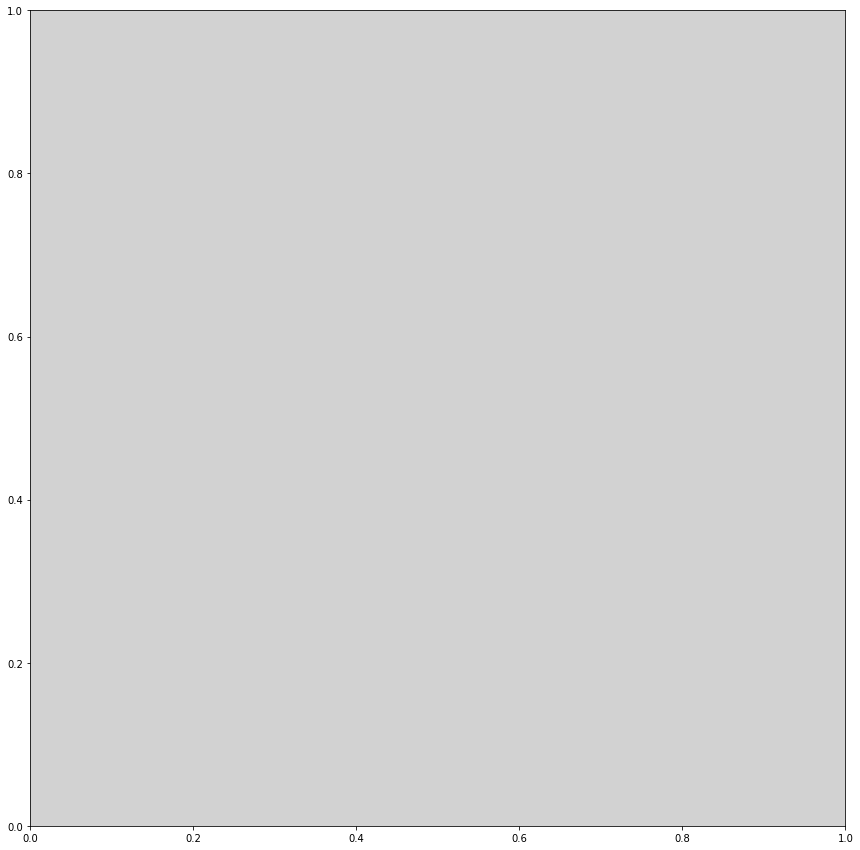

In [3]:
#creating figure
fig, ax = plt.subplots(1,1)
fig.set_figheight(15)
fig.set_figwidth(15)

for foldername in os.listdir('./'):
    if foldername.startswith("structured"):
        for filename in os.listdir('{}/'.format(foldername)):
            if filename.endswith(".json"):
                fullfilepath = os.path.join(foldername,filename)
                
                # load match data and plot match events
                with open(fullfilepath, 'r') as match_file:
                # get match data
                    match = json.load(match_file)
                
                death_pos, spawn_pos = {'x': [], 'y': []}, {'x': [], 'y': []}

                # get pos data
                events = match['events']
                for evt in events:
                    if evt['type'] == 'spawn':
                        spawn_pos['x'].append( evt['data']['pos']['x'] )
                        spawn_pos['y'].append( evt['data']['pos']['y'] )
                    if evt['type'] == 'death':
                        death_pos['x'].append( evt['data']['pos']['x'] )
                        death_pos['y'].append( evt['data']['pos']['y'] )

                # get map image
                try:
                    map_file_name = PATH_TO_WW2_MAPS + MAP_IMAGES[match['map']]
                    map_image = plt.imread(map_file_name)
                            
                
                    # plot map
                    ax.imshow(map_image)
                    ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
                    # plot spawns
                    ax.scatter(spawn_pos['x'], spawn_pos['y'], color='blue')
                    # plot death events
                    ax.scatter(death_pos['x'], death_pos['y'], color='red')
                    # set title
                    ax.set_title('{} ({})'.format(match['map'], match['mode']))
                    #save figure in disk
                    plt.savefig('{}/{}-{}-{}'.format(foldername,"structured",match['end_time_s'], match['id']))
                    # clear the current axes
                    plt.cla()
                except KeyError:
                    print('ERROR in file:' + os.path.join(foldername,filename) + ' file consists of map name as ' + match['map'] + '. There are no images for this map. This is BAD data and this file is skipped.')
                
print("All the .png files for the corresponding json files are created. This .png file shows the spawns and deaths occured in the game.")